# TECHNOHACKS INTERNSHIP

# TASK-3

**Bulid a model that can predict which employees are most likely to leave the company**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("C:\\Users\\saisu\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.shape

(1470, 35)

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
for col in df.columns:
    uniques = len(df[col].unique())
    if uniques == 1:
        print("Dropping col: ", col)
        

Dropping col:  EmployeeCount
Dropping col:  Over18
Dropping col:  StandardHours


In [6]:
df.drop(columns=["EmployeeCount", "Over18", 'StandardHours'], inplace=True)

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#  EXPLORATORY DATA ANALYSIS

In [21]:
# Ad hoc function to encode integer hierarquical values to string labels
def encode(df, field, map_):
    df[f"{field}Map"] = df[field].apply(lambda x: map_[str(x)])
    return df

# Ad hoc function to plot a feature count vs. Attrition count
def plot_count(df, field, title, compare_with_attrition = False):
    plt.figure(figsize=(10,4))
    if compare_with_attrition:
        df2 = pd.DataFrame({
            field: df[field], 
            'Attrition': df['Attrition']
        })
        sns.countplot(data=df2, x=field, hue='Attrition')
    else:
        sns.countplot(data=df, x=field)

    plt.title(title)
    plt.xticks(rotation=30)
    plt.show()
# Age: employees has mostly between 30 and 40yo

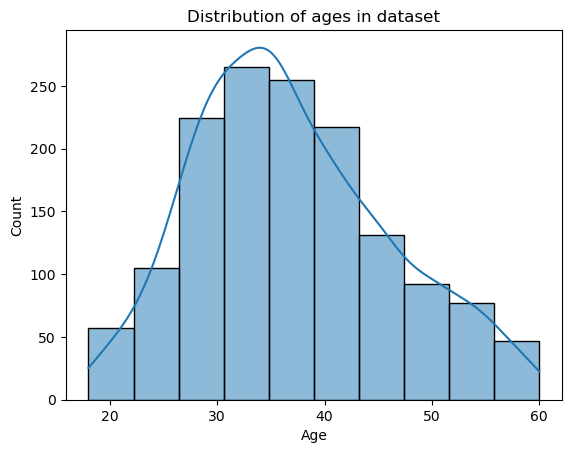

In [24]:
# Age: employees has mostly between 30 and 40yo
sns.histplot(df.Age, bins=10, kde=True)
plt.title("Distribution of ages in dataset")
plt.show()

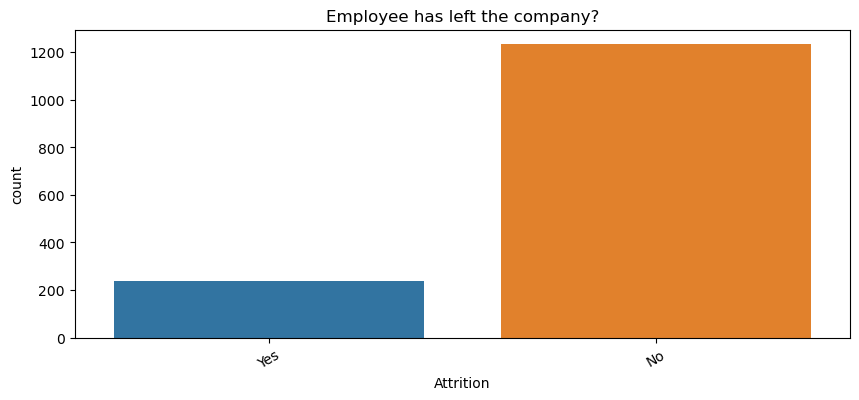

In [25]:
# Attrition: Whether the employee has left the company or not

plot_count(df, 'Attrition', 'Employee has left the company?')

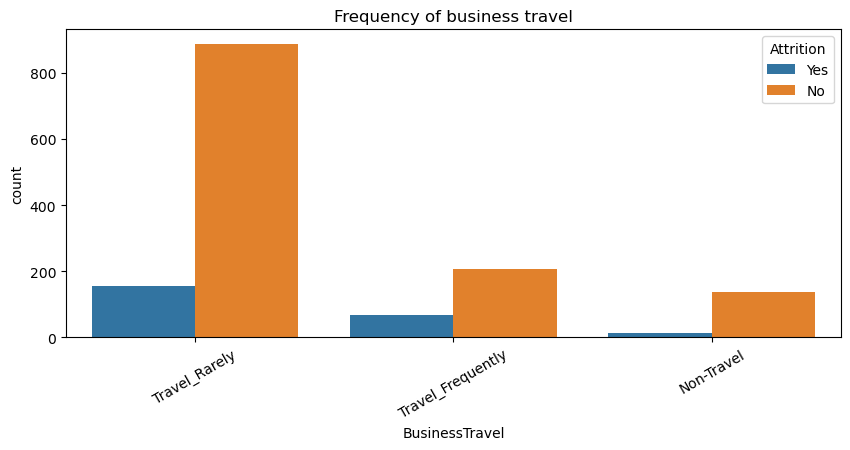

In [26]:
# BusinessTravel: The frequency of business travel

plot_count(df, 'BusinessTravel', 'Frequency of business travel', True)

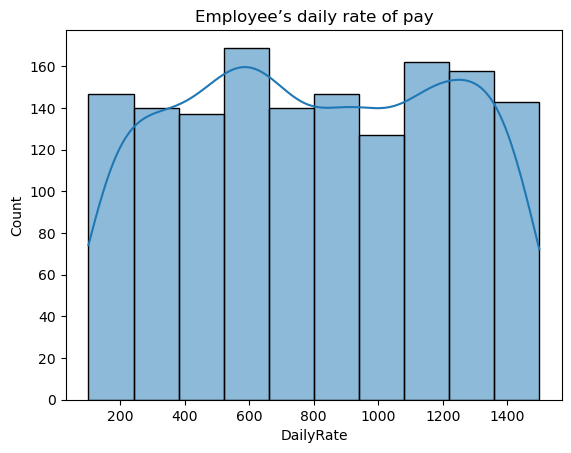

In [27]:
# DailyRate: The employee’s daily rate of pay

sns.histplot(df['DailyRate'], bins=10, kde=True)
plt.title("Employee’s daily rate of pay")
plt.show()


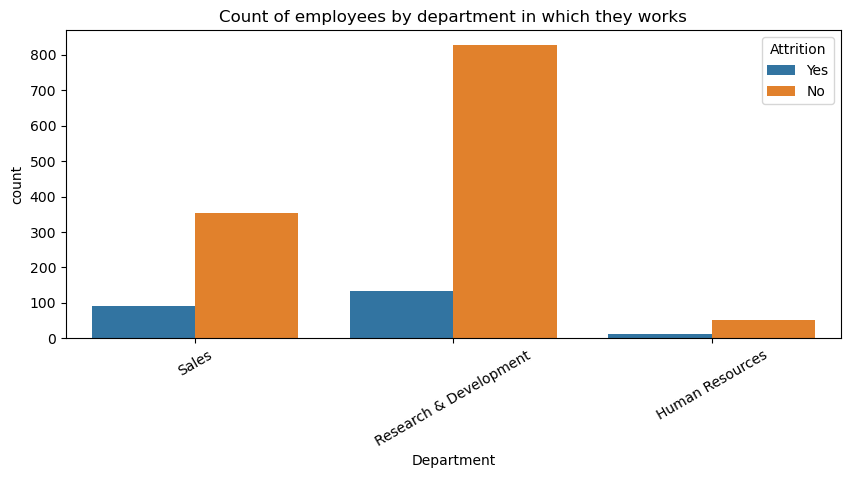

In [28]:
# Department: The department in which the employee works

plot_count(df, 'Department', 'Count of employees by department in which they works', True)

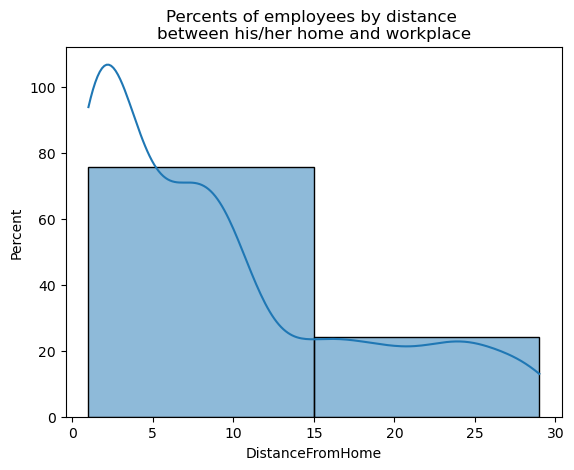

In [29]:
# DistanceFromHome: The distance between the employee’s home and workplace
sns.histplot(df['DistanceFromHome'], bins=2, kde=True, stat='percent', legend=True)
plt.title("Percents of employees by distance \nbetween his/her home and workplace")
plt.show()

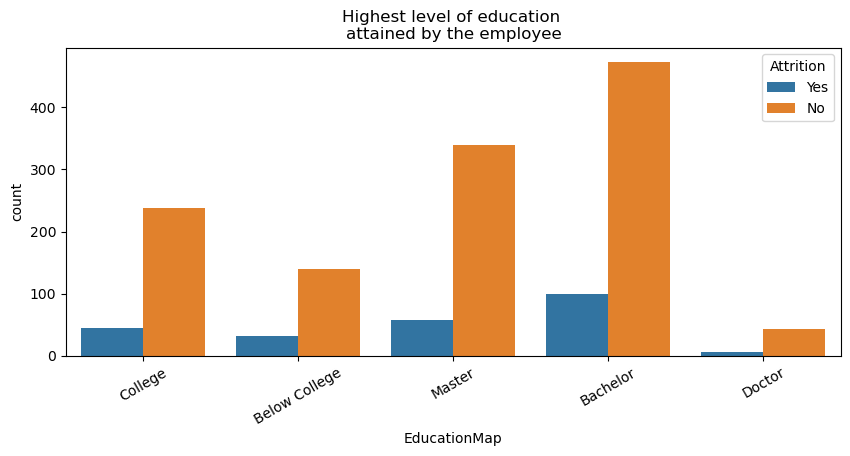

In [31]:
# Education: The highest level of education attained by the employee
plot_count(encode(df, 'Education', {'1': 'Below College', '2': 'College', '3': 'Bachelor', '4': 'Master', '5': 'Doctor'}), \
           'EducationMap', 'Highest level of education \nattained by the employee', True)

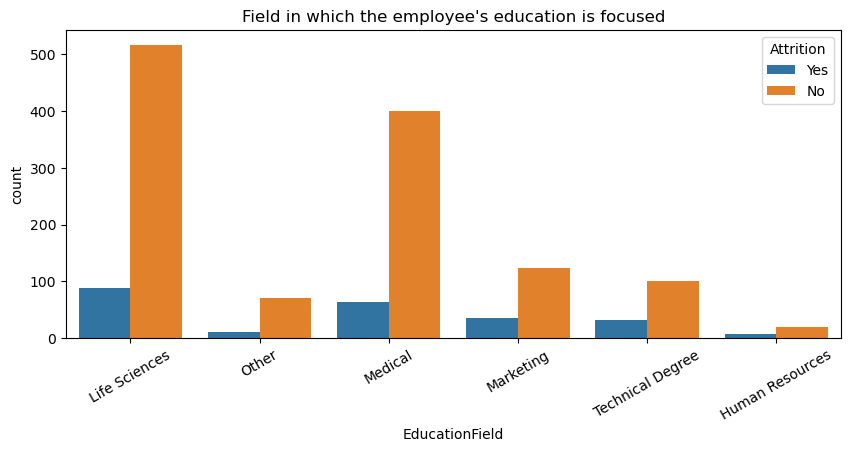

In [32]:
# EducationField: The field in which the employee’s education is focused
 
plot_count(df, 'EducationField', "Field in which the employee's education is focused", True)

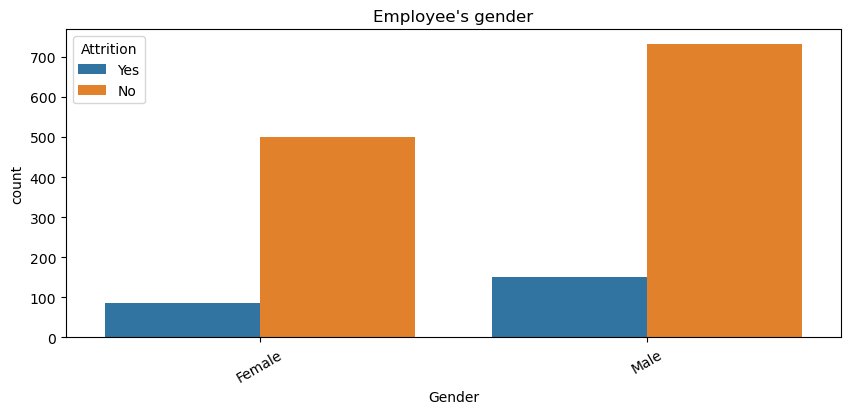

In [33]:
# Gender: The employee’s gender
plot_count(df, 'Gender', "Employee's gender", True)

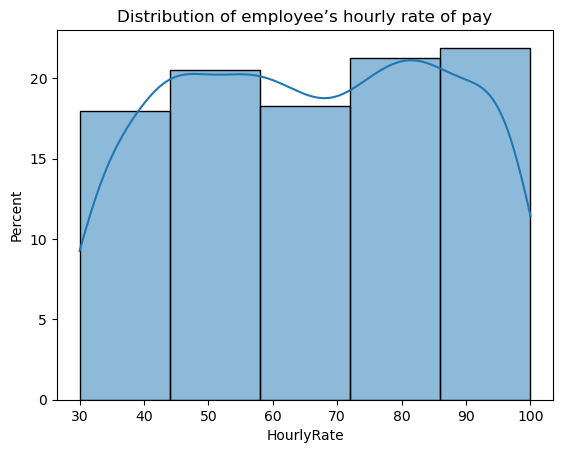

In [34]:
# HourlyRate: The employee’s hourly rate of pay
sns.histplot(df['HourlyRate'], kde=True, bins=5, stat='percent')
plt.title("Distribution of employee’s hourly rate of pay")
plt.show()

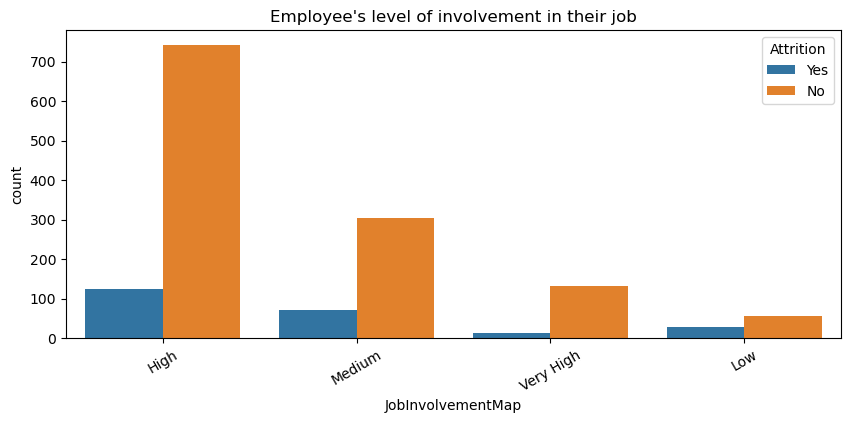

In [35]:
# JobInvolvement: The employee’s level of involvement in their job
plot_count(encode(df, 'JobInvolvement', {'1': 'Low', '2': 'Medium', '3': 'High', '4': 'Very High'}), \
           'JobInvolvementMap', "Employee's level of involvement in their job", True)

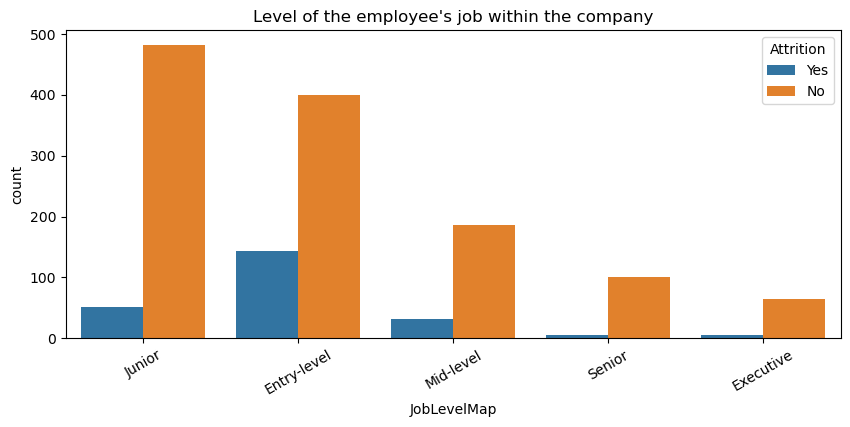

In [36]:
# JobLevel: The level of the employee’s job within the company

plot_count(encode(df, 'JobLevel', \
            {'1': 'Entry-level', '2': 'Junior',  '3': 'Mid-level', '4': 'Senior', '5': 'Executive'}), \
           "JobLevelMap", "Level of the employee's job within the company", True)

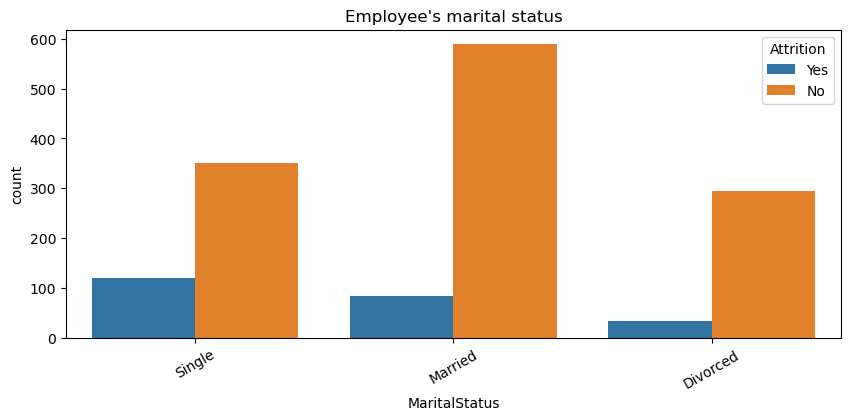

In [37]:
# MaritalStatus: The employee’s marital status
plot_count(df, "MaritalStatus", "Employee's marital status", True)

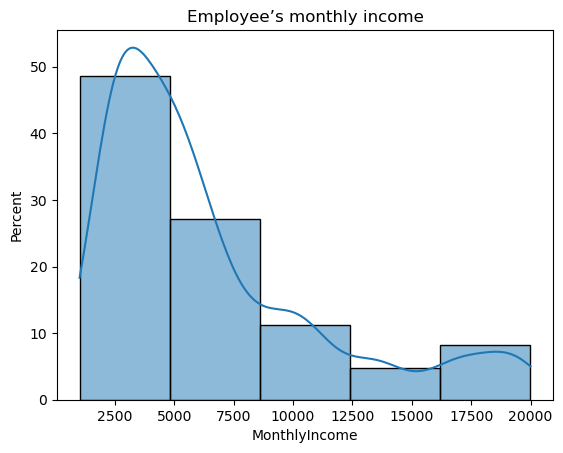

In [38]:
# MonthlyIncome: The employee’s monthly income
sns.histplot(df['MonthlyIncome'], bins=5, kde=True, stat='percent')
plt.title("Employee’s monthly income")
plt.show()

**Relations between monthly income and satisfaction**


In [40]:

df[['MonthlyIncome', 'JobSatisfaction']].corr()

,MonthlyIncome,JobSatisfaction
MonthlyIncome,1.000000,-0.007157
JobSatisfaction,-0.007157,1.000000


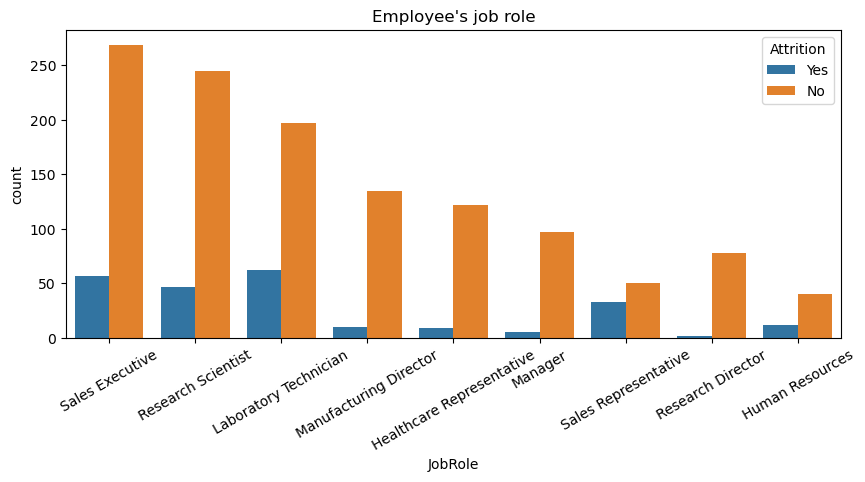

In [41]:
# JobRole: The employee’s job role
plot_count(df, "JobRole", "Employee's job role", True)


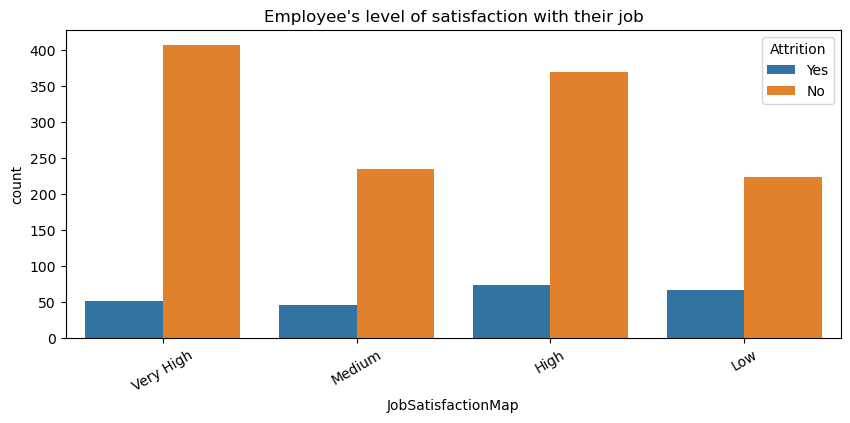

In [42]:
# JobSatisfaction: The employee’s level of satisfaction with their job;
plot_count(encode(df, 'JobSatisfaction', {'1': 'Low', '2': 'Medium', '3': 'High', '4': 'Very High'}), \
           'JobSatisfactionMap', "Employee's level of satisfaction with their job", True)

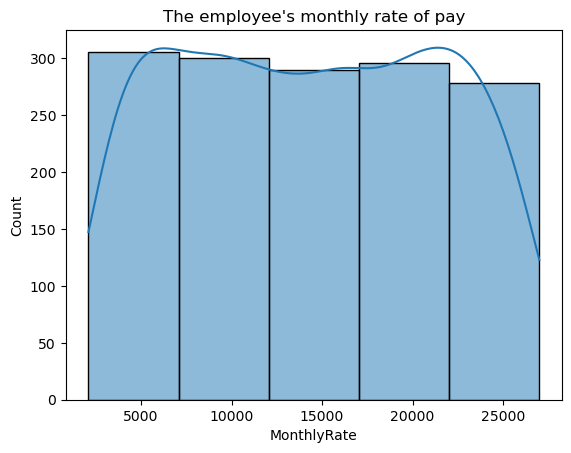

In [43]:
# MonthlyRate: The employee’s monthly rate of pay
sns.histplot(df['MonthlyRate'], bins=5, kde=True)
plt.title("The employee's monthly rate of pay")
plt.show()


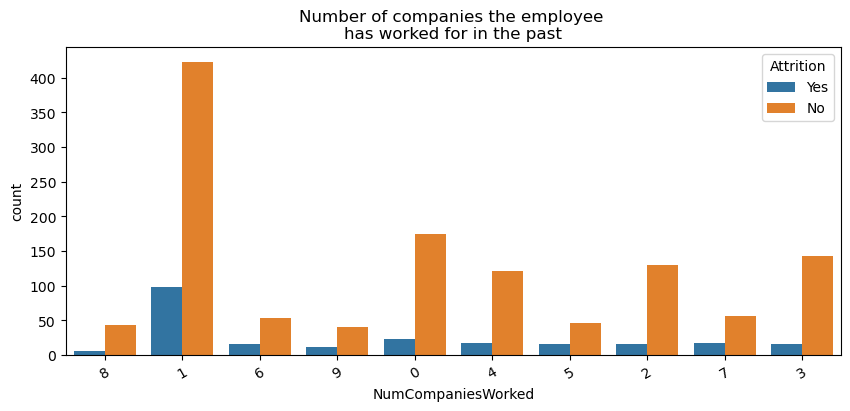

In [44]:

# NumCompaniesWorked: The number of companies the employee has worked for in the past
plot_count(pd.DataFrame({
    'NumCompaniesWorked': df['NumCompaniesWorked'].apply(lambda x : str(x)).sort_values(), 
    'Attrition': df['Attrition']}), 'NumCompaniesWorked', \
        "Number of companies the employee \nhas worked for in the past", True)

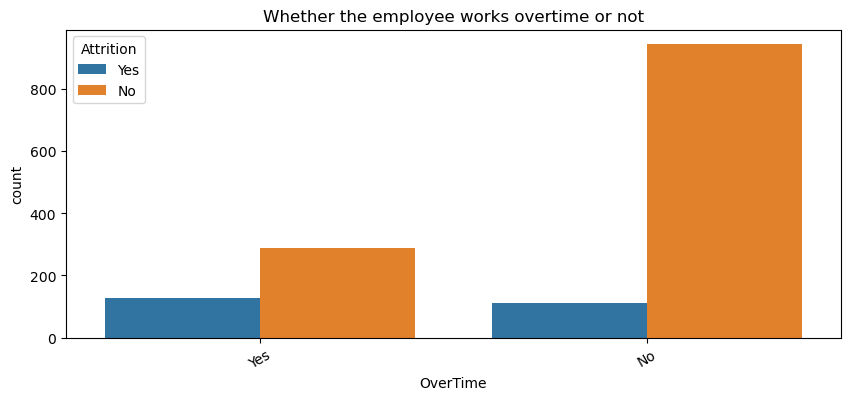

In [45]:
# OverTime: Whether the employee works overtime or not
plot_count(df, 'OverTime', "Whether the employee works overtime or not", True)

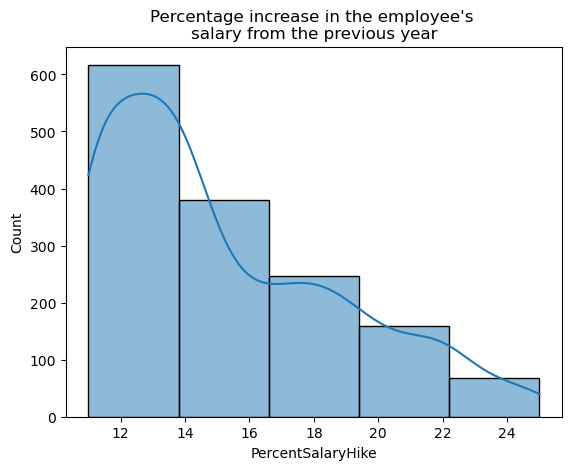

In [46]:
# PercentSalaryHike: The percentage increase in the employee’s salary from the previous year
sns.histplot(df['PercentSalaryHike'], bins=5, kde=True)
plt.title("Percentage increase in the employee's \nsalary from the previous year")
plt.show()

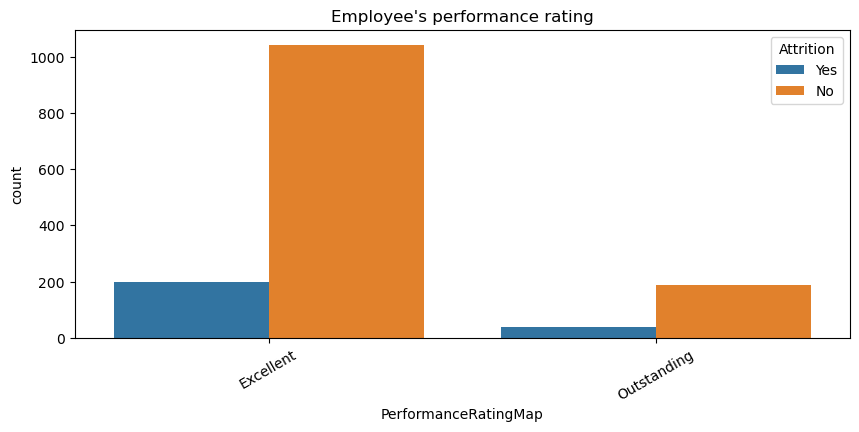

In [47]:
# PerformanceRating: The employee’s performance rating
plot_count(encode(df, 'PerformanceRating', {'1': 'Low', '2': 'Good', '3': 'Excellent', '4': 'Outstanding'}), \
           "PerformanceRatingMap", "Employee's performance rating", True)

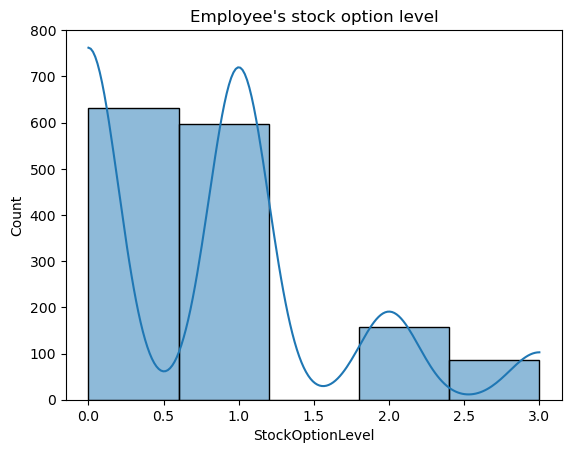

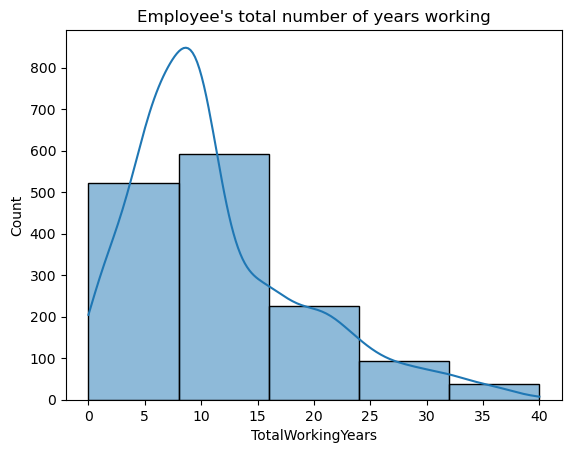

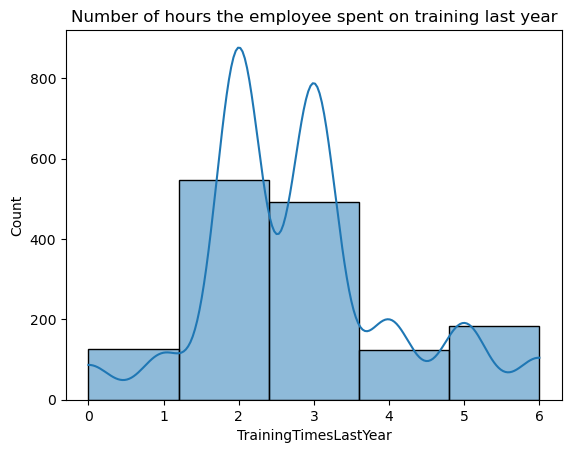

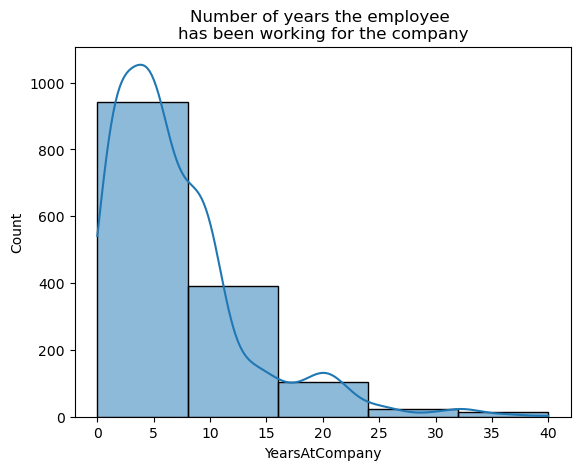

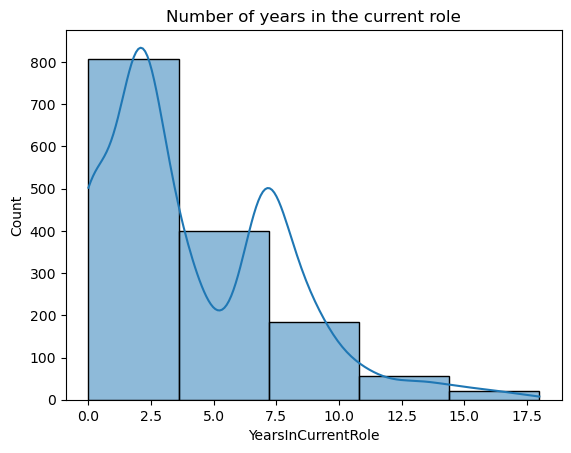

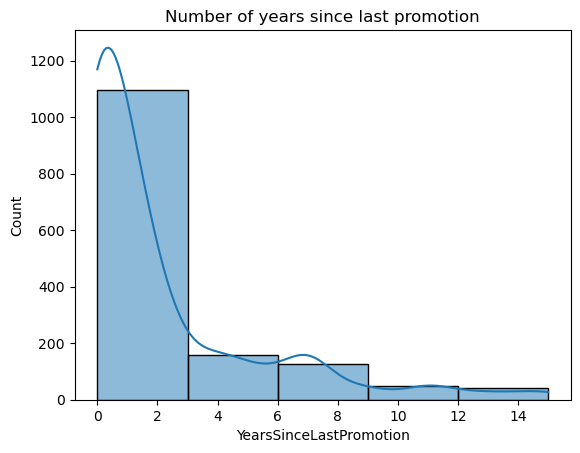

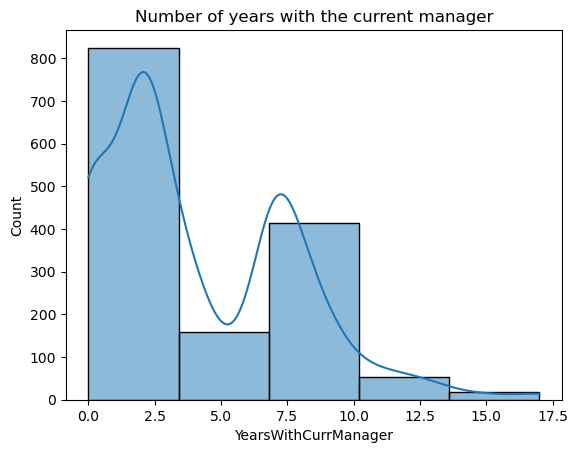

In [50]:
fields = ['StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', \
          'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
titles = [
    "Employee's stock option level", 
    "Employee's total number of years working",
    "Number of hours the employee spent on training last year",
    "Number of years the employee \nhas been working for the company",
    "Number of years in the current role",
    "Number of years since last promotion",
    "Number of years with the current manager"
]

for row in zip(fields, titles):
    sns.histplot(df[row[0]], bins=5, kde=True)
    plt.title(row[1])
    plt.show()


**RelationshipSatisfaction: The employee’s level of satisfaction with their relationships at work**


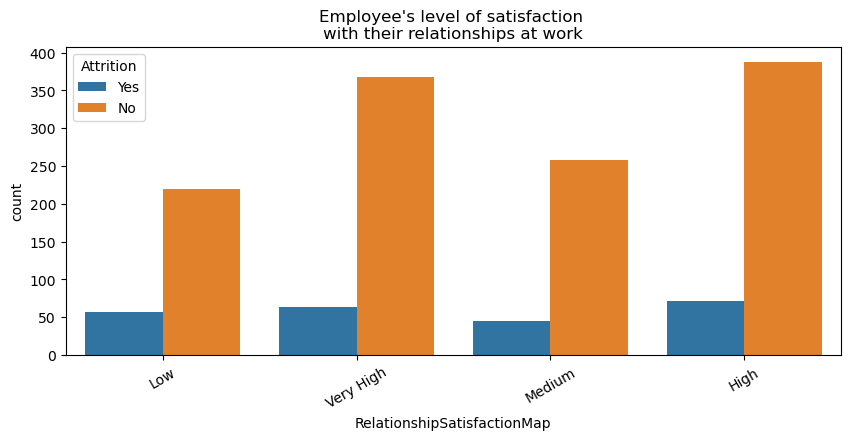

In [52]:

plot_count(encode(df, 'RelationshipSatisfaction', {'1': 'Low', '2': 'Medium', '3': 'High', '4': 'Very High'}), \
           'RelationshipSatisfactionMap', "Employee's level of satisfaction \nwith their relationships at work", True)

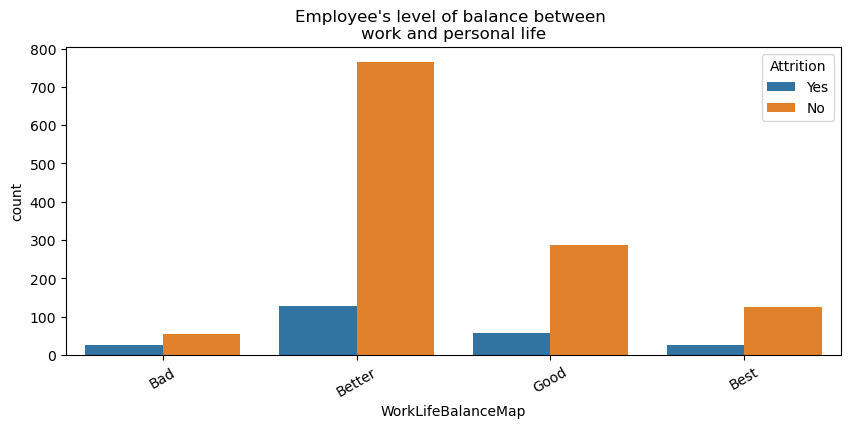

In [53]:
# WorkLifeBalance: The employee’s level of balance between work and personal life
plot_count(encode(df, 'WorkLifeBalance', {'1':'Bad', '2':'Good', '3':'Better', '4':'Best'}), \
    'WorkLifeBalanceMap', "Employee's level of balance between \nwork and personal life", True)

# DATA PREPROCESSING

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()
for field in df.columns:
    if df[field].dtypes == 'object':
        df[field] = encoder.fit_transform(df[field])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


**correlation matric**

In [10]:
correlation_matrix = df.corr()

In [11]:
correlation_matrix

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,-0.010336,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,-0.024037,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


In [12]:
correlation_matrix.style.background_gradient(cmap='viridis')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,-0.010336,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,-0.024037,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


# MODELLING&EVALUATION

**X&y**

In [73]:

X = df.drop(["Attrition"], axis=1)
y = df["Attrition"]

# **best random state number**

In [74]:
Train = []
Test = []
CV = []

for i in range(0,151):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    from sklearn.linear_model import LogisticRegression 
    log_default =  LogisticRegression()
    log_default.fit(X_train,y_train)
    
    ypred_train =  log_default.predict(X_train)
    ypred_test = log_default.predict(X_test)
    
    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train, ypred_train))
    Test.append(accuracy_score(y_test, ypred_test))
    
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(log_default, X_train, y_train, cv=5, scoring="accuracy").mean())

    
em = pd.DataFrame({"Train":Train, "Test":Test, "CV":CV})
gm = em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['CV'])<=0.05)]
rs = gm[gm["CV"]==gm["CV"].max()].index.to_list()[0]

print("best random_state number:",rs)

best random_state number: 79


**splitting the data**

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7)

In [104]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,precision_score,f1_score,classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve

# 1.logistic regression

In [134]:
#creating a model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
lr_predict = lr.predict(X_test)

# Calculate the accuracy score
accuracy_lr = lr.score(X_test,y_test)
print("Logistic Regression accuracy is:",accuracy_lr)


Logistic Regression accuracy is: 0.8571428571428571


In [135]:

cls_report = classification_report(y_test,lr_predict)
print(cls_report)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       251
           1       0.67      0.05      0.09        43

    accuracy                           0.86       294
   macro avg       0.76      0.52      0.50       294
weighted avg       0.83      0.86      0.80       294



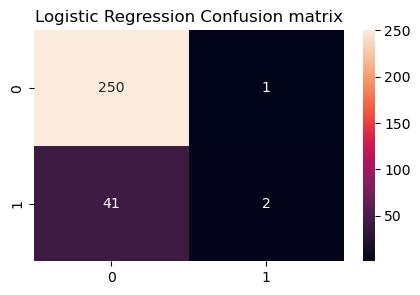

In [107]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,lr_predict),annot=True,fmt="d")
plt.title("Logistic Regression Confusion matrix",fontsize=12)
plt.show()

# 2.KNN

In [108]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
accuracy_knn = knn.score(X_test,y_test)
print("K Nearest Neighbors classifier accuracy is:",accuracy_knn)

K Nearest Neighbors classifier accuracy is: 0.8469387755102041


In [109]:
cls_report = classification_report(y_test,knn_predict)
print(cls_report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       251
           1       0.25      0.02      0.04        43

    accuracy                           0.85       294
   macro avg       0.55      0.51      0.48       294
weighted avg       0.77      0.85      0.79       294



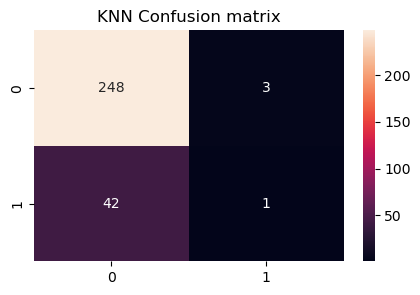

In [111]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,knn_predict),annot=True,fmt="d")
plt.title("KNN Confusion matrix",fontsize=12)
plt.show()

# 3.SVC

In [112]:
svc_model = SVC(random_state=1)
svc_model.fit(X_train,y_train)
sv_predict = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is:",accuracy_svc)

SVM accuracy is: 0.8537414965986394


In [115]:
cls_report = classification_report(y_test,sv_predict)
print(cls_report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       251
           1       0.00      0.00      0.00        43

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.85      0.79       294



# 4.RANDOM FOREST CLASSIFIER

In [117]:
rf_model = RandomForestClassifier(n_estimators=300)
rf_model.fit(X_train,y_train)
y_pred1=rf_model.predict(X_test)
accuracy_rf = rf_model.score(X_test,y_test)
print("Random Forest accuracy is:",accuracy_rf)

Random Forest accuracy is: 0.8605442176870748


In [118]:
cls_report = classification_report(y_test,y_pred1)
print(cls_report)

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       251
           1       0.62      0.12      0.20        43

    accuracy                           0.86       294
   macro avg       0.75      0.55      0.56       294
weighted avg       0.83      0.86      0.82       294



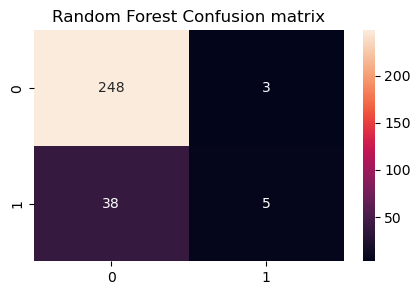

In [119]:

plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt="d")
plt.title("Random Forest Confusion matrix",fontsize=12)
plt.show()

# 5.DECISION TREE

In [120]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred2=dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is:",accuracy_dt)

Decision Tree accuracy is: 0.7653061224489796


In [121]:
cls_report = classification_report(y_test,y_pred2)
print(cls_report)


              precision    recall  f1-score   support

           0       0.88      0.84      0.86       251
           1       0.25      0.30      0.27        43

    accuracy                           0.77       294
   macro avg       0.56      0.57      0.57       294
weighted avg       0.78      0.77      0.77       294



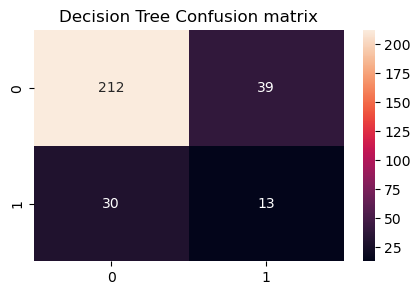

In [124]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt="d")
plt.title("Decision Tree Confusion matrix",fontsize=12)
plt.show()

# 6.GRADIENT BOSSTING CLASSIFIER

In [127]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)
y_pred3=gbc_model.predict(X_test)
accuracy_gbc = gbc_model.score(X_test,y_test)
print("Gradient Boosting accuracy is:",accuracy_gbc)

Gradient Boosting accuracy is: 0.8571428571428571


In [128]:
cls_report = classification_report(y_test,y_pred3)
print(cls_report)


              precision    recall  f1-score   support

           0       0.89      0.96      0.92       251
           1       0.52      0.28      0.36        43

    accuracy                           0.86       294
   macro avg       0.70      0.62      0.64       294
weighted avg       0.83      0.86      0.84       294



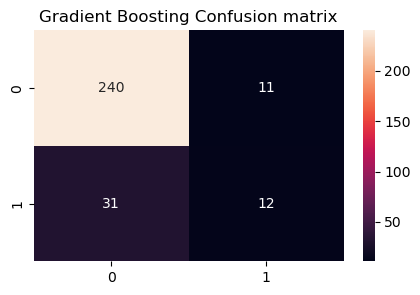

In [130]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True,fmt="d")
plt.title("Gradient Boosting Confusion matrix",fontsize=12)
plt.show()

# 7.ADABOOST CLASSIFIER

In [146]:
abc_model = AdaBoostClassifier()
abc_model.fit(X_train,y_train)
y_pred4=abc_model.predict(X_test)
accuracy_abc = abc_model.score(X_test,y_test)
print("Ada Boost Classifier is:",accuracy_abc)

Ada Boost Classifier is: 0.8639455782312925


In [147]:
cls_report = classification_report(y_test,y_pred4)
print(cls_report)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       251
           1       0.55      0.37      0.44        43

    accuracy                           0.86       294
   macro avg       0.72      0.66      0.68       294
weighted avg       0.85      0.86      0.85       294



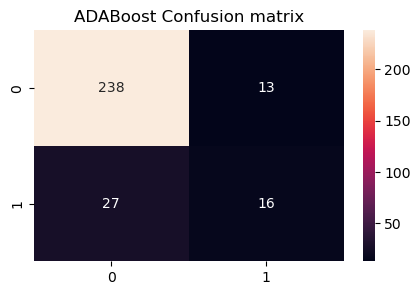

In [153]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred4),annot=True,fmt="d")
plt.title("ADABoost Confusion matrix",fontsize=12)
plt.show()

# 8.Extreme Gradient Boosting

In [148]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred5 = xgb_model.predict(X_test)
accuracy_xgb = xgb_model.score(X_test,y_test)
print("Ada Boost Classifier is:",accuracy_xgb)

Ada Boost Classifier is: 0.8571428571428571


In [149]:
cls_report = classification_report(y_test,y_pred5)
print(cls_report)


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       251
           1       0.52      0.26      0.34        43

    accuracy                           0.86       294
   macro avg       0.70      0.61      0.63       294
weighted avg       0.83      0.86      0.84       294



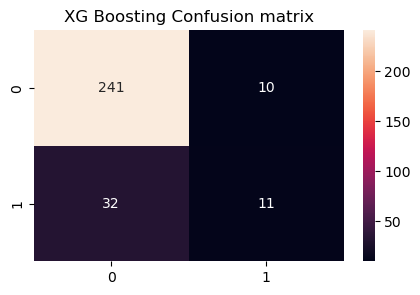

In [150]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred5),annot=True,fmt="d")
plt.title("XG Boosting Confusion matrix",fontsize=12)
plt.show()

In [154]:
# List of classifier models

classifiers = {

    'RandomForest': RandomForestClassifier(),

    'Support Vector Machine': SVC(),

     'KNN': KNeighborsClassifier(),

     'LogisticRegression': LogisticRegression(max_iter=100),

     'Decision Tree': DecisionTreeClassifier(),
     
     'Adaboost classifier':AdaBoostClassifier(),
     
     'Gradientboosting classifier':GradientBoostingClassifier(),
     
      'XGB Classifier': XGBClassifier()

}

results = pd.DataFrame(columns=['Accuracy', 'Bias', 'variance'])

for method, cls in classifiers.items():

#train the classifier

    cls.fit(X_train,y_train)

#Predicting the test set results

    y_pred = cls.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    bias = cls.score(X_train,y_train)

    variance = cls.score(X_test, y_test)

    results.loc[method]=[acc, bias, variance]

#Making the Confusion matrix

    from sklearn.metrics import confusion_matrix

    cm= confusion_matrix(y_test,y_pred)

In [155]:
cm

array([[241,  10],
       [ 32,  11]], dtype=int64)

**RESULTS**

In [156]:
results

,Accuracy,Bias,variance
RandomForest,0.860544,1.000000,0.860544
Support Vector Machine,0.853741,0.835034,0.853741
KNN,0.843537,0.859694,0.843537
LogisticRegression,0.857143,0.838435,0.857143
Decision Tree,0.775510,1.000000,0.775510
Adaboost classifier,0.863946,0.897959,0.863946
Gradientboosting classifier,0.857143,0.960034,0.857143
XGB Classifier,0.857143,1.000000,0.857143


# MODEL COMPARISON

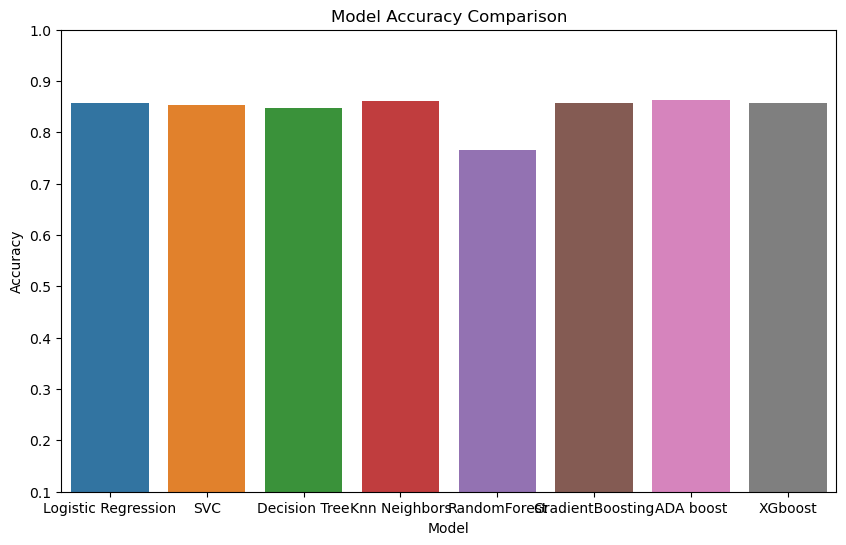

In [169]:
models = ['Logistic Regression', 'SVC', 'Decision Tree', 'Knn Neighbors','RandomForest','GradientBoosting',"ADA boost","XGboost"]
accuracy = [accuracy_score(y_test, lr_predict), accuracy_score(y_test, sv_predict),accuracy_score(y_test, knn_predict), accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred3),accuracy_score(y_test, y_pred4),accuracy_score(y_test, y_pred5)]
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracy)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.10,1.0)
plt.show()


# Conslusion

# in the above models ,**ADA BOOST CLASSIFIER** is the good fit model. it has High accuracy